In [ ]:
# default_exp opt

In [1]:
#export
import GPyOpt
import GPy
import numpy as np
from autoforest.reg import *

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
#export
class RfOptimizer:
    domain       =[{'name': 'min_sample_leaf',      'type': 'continuous', 'domain': (2., 10.)},
               {'name': 'n_estimators','type': 'continuous', 'domain': (10.,100.)},
               {'name': 'max_features','type' : 'continuous', 'domain': (0.1, 1.0)}]
    def x_to_dict(self, x):
        return { d['name']:var for d, var in zip(self.domain,x)}
    
    def __init__(self, rf_regressor, 
                 key='val_rmse', 
                max_iter=50):
        
        self.rfmodel = rf_regressor
        self.max_iter = max_iter
        self.opt=None
        self.key = key

    def _fit_rf(self, x):
        fs = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):   # usually we only get one row of parameters for each call
            fs[i] = 0
            print(" ")
            self.rfmodel.create_model(**self.x_to_dict(x[i]))
            result = self.rfmodel.fit()
            print(result)
            
        return result[self.key]
    
    
    def run_optimizer(self,acquisition_weight=0.2):
        self.opt = GPyOpt.methods.BayesianOptimization(f = self._fit_rf,            # function to optimize       
                                          domain = self.domain,         # box-constraints of the problem
                                          acquisition_type ='LCB',       # LCB acquisition
                                          acquisition_weight = acquisition_weight)   # Exploration exploitation
        self.opt.run_optimization(max_iter=self.max_iter)
    def plot_convergence(self):
        if self.opt is not None:
            self.opt.plot_convergence()
            

In [4]:
filename = "Buldozers.csv"           # dataframe containing all the data
y_col_name = 'SalePrice'         # name of the column we are going to predict
split_pct = 0.2             # size of verification dataset
datefield = 'saledate'     # name of the field containing the date-part
ctd = ['saleDayofyear',
 'state',
 'saleDay',
 'Track_Type',
 'Stick_Length',
 'fiModelDescriptor',
 'Pad_Type',
 'saleWeek',
 'Transmission',
 'Blade_Width',
 'Scarifier',
 'Blade_Type',
 'auctioneerID',
 'Enclosure_Type',
 'saleDayofweek',
 'fiModelSeries',
 'Engine_Horsepower',
 'UsageBand',
 'saleMonth',
 'Ripper',
 'Coupler',
 'Turbocharged',
 'Undercarriage_Pad_Width',
 'Travel_Controls',
 'Thumb',
 'Backhoe_Mounting',
 'Tip_Control',
 'Pushblock',
 'Differential_Type',
 'Pattern_Changer',
 'MachineHoursCurrentMeter_na',
 'Blade_Extension',
 'Ride_Control',
 'datasource',
 'Forks',
 'Steering_Controls',
 'Grouser_Type',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_start',
 'saleIs_year_end',
 'saleElapsed',
 'SalesID',
 'saleYear',
 'Unnamed: 0',
 'MachineID']

In [5]:
import pandas as pd
from autoforest.cleaner import *
from fastai.tabular.all import *


In [6]:
df = pd.read_csv(filename, low_memory=False)
df = fix_dataframe(df, datefield= datefield, y_col_name = y_col_name)
splits = split_by_date(df, pct=0.2)
reg = RfRegressor.from_dataframe(df, y_col_name, splits)
#reg.ctd = ctd

In [7]:
opt = RfOptimizer(reg, max_iter=10)

In [8]:
opt.run_optimizer()

 
training
finished
training time: 8.152345418930054
{'train_rmse': 0.15157699128783036, 'val_rmse': 0.2765508777331021, 'oob_error': 0.2661967259412376, 'oob_score': 0.8472860122750021}
 
training
finished
training time: 15.610864162445068
{'train_rmse': 0.19917285369834956, 'val_rmse': 0.2768029333768044, 'oob_error': 0.26312653915442963, 'oob_score': 0.8507883593342684}
 
training
finished
training time: 14.971839666366577
{'train_rmse': 0.20141638427977562, 'val_rmse': 0.2755706300883361, 'oob_error': 0.2636820193943891, 'oob_score': 0.8501576999900371}
 
training
finished
training time: 12.958311319351196
{'train_rmse': 0.12537598912612793, 'val_rmse': 0.27495901019657504, 'oob_error': 0.2631572672228922, 'oob_score': 0.8507535072570641}
 
training
finished
training time: 24.191136121749878
{'train_rmse': 0.1920983488513243, 'val_rmse': 0.27661928876367076, 'oob_error': 0.2633815852020783, 'oob_score': 0.85049896030277}
 
training
finished
training time: 18.388091325759888
{'train

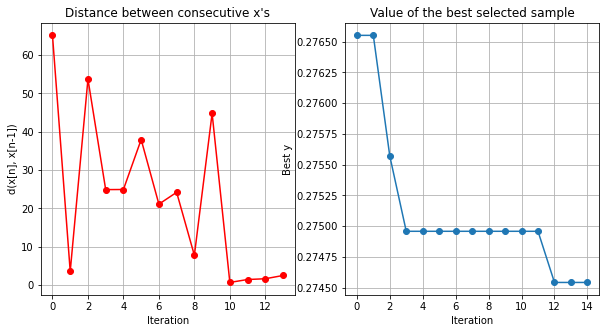

In [9]:
opt.plot_convergence()